In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
with open('MURA_Train_DenseNet121_Complete.npy', 'rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    data_dict = np.load(f,allow_pickle=True).item()
    
    
print(data_dict.keys())

filename_mura = np.array(data_dict['filename'])
patient_id_mura = data_dict['patient_id']
view_mura = data_dict['view']
view_label_mura = data_dict['view_label']

print(view_label_mura)

X_train_mura = X_train_0
y_train_mura = y_train_0

N_mura = len(filename_mura)

view_select_1 = 2 #Finger

X_train_mura_ch_1 = X_train_mura[view_mura==view_select_1]
filename_mura_ch_1 = filename_mura[view_mura==view_select_1]
N_mura_1 = len(filename_mura_ch_1)
y_train_mura_ch_1 = np.zeros(N_mura_1)

view_select_2 = 0 #Finger

X_train_mura_ch_2 = X_train_mura[view_mura==view_select_2]
filename_mura_ch_2 = filename_mura[view_mura==view_select_2]
N_mura_2 = len(filename_mura_ch_2)
y_train_mura_ch_2 = np.ones(N_mura_2)


print(X_train_mura_ch_1.shape, y_train_mura_ch_1.shape)
print(X_train_mura_ch_2.shape, y_train_mura_ch_2.shape)

dict_keys(['filename', 'patient_id', 'view', 'view_label'])
['SHOULDER', 'HUMERUS', 'FINGER', 'ELBOW', 'WRIST', 'FOREARM', 'HAND']
(5106, 1024) (5106,)
(8379, 1024) (8379,)


In [3]:
X_train = np.concatenate((X_train_mura_ch_1, X_train_mura_ch_2))
y_train = np.concatenate((y_train_mura_ch_1, y_train_mura_ch_2))
filename = np.concatenate((filename_mura_ch_1, filename_mura_ch_2))

print(X_train.shape, y_train.shape, filename.shape)

(13485, 1024) (13485,) (13485,)


In [ ]:
import umap 
 
    
import matplotlib.pyplot as plt
#%matplotlib inline
    
np.random.seed(100) 
ump = umap.UMAP(n_neighbors=10, 
        min_dist=0.001, 
        #spread = ,
        n_components=2, 
        random_state=150, 
        n_epochs = 300,
        metric= 'euclidean') 
 
y_umap = ump.fit_transform(X_train) 
 
plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1, cmap='Spectral') 
 
#cbar = plt.colorbar(boundaries=np.arange(3)-0.5) 
#cbar.set_ticks(np.arange(3)) 
#cbar.set_ticklabels(classes) 

<IPython.core.display.Javascript object>


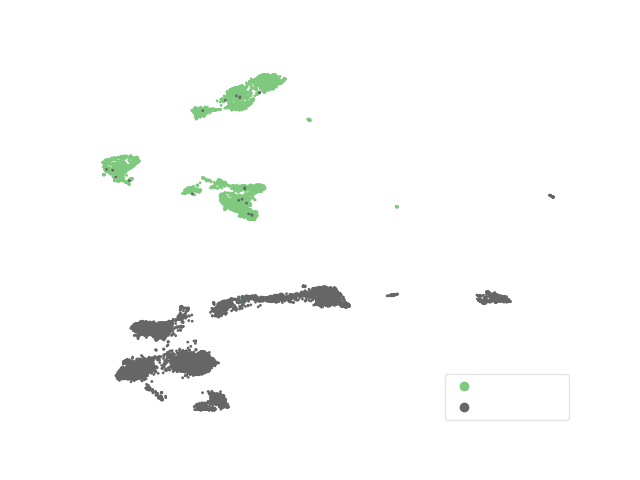

In [13]:
%matplotlib notebook

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

#np.random.seed(42)
#idxs = np.random.permutation(len(y_umap))

fig, ax = plt.subplots(1)
scatter = plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1, cmap='Accent') 

plt.axis('off')

handles, labels = scatter.legend_elements()
#handles = [handles[0], handles[2], handles[1]]
#labels = [labels[0], labels[1], labels[2]]

lgd = plt.legend(handles, labels,
                    loc="lower right")
lgd.get_texts()[0].set_text('                 ') #Finger
lgd.get_texts()[1].set_text('                 ') #Shoulder
lgd.get_frame().set_alpha(None)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))

plt.savefig('MURA_pairs/MURA_pairs1.tif', dpi=400, transparent=True)

In [6]:
#x=[-6, 10], y=[5,20]

In [7]:
#x=[16.75, 18.25], y=[0.25, 1.25]

In [16]:
from imageio import imread 
from skimage import exposure

def get_indexes_within(y_umap,x,y):
    xmin = x[0]
    xmax = x[1]
    ymin = y[0]
    ymax = y[1]
    
    idx1 = (y_umap[:,0] > xmin) & (y_umap[:,0] < xmax)
    idx2 = (y_umap[:,1] > ymin) & (y_umap[:,1] < ymax)
    
    idx = idx1 & idx2
    
    return idx

from imageio import imread 

def plot_within_region_muracxp_pair(y_umap,filename,labels,x,y,target_label=0,save_is=[],equalize=False):

    idxs = get_indexes_within(y_umap,x=x, y=y)

    #print(label.shape, labels.dtype)
    
    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]
    sub_labels = np.array(labels)[idxs]
    
    fnames = fnames[sub_labels==target_label]
    sub_y_umap = sub_y_umap[sub_labels==target_label]

    print('Total number of points in this region: ', len(fnames))

    for i in range(len(fnames)):
        print(i, fnames[i])
        print(sub_y_umap[i])
        img = imread(fnames[i], as_gray=False, pilmode="RGB") 
        if equalize:
            img = exposure.equalize_hist(img)
        plt.figure()
        plt.imshow(img)   
        plt.axis('off')
        if i in save_is:
            plt.savefig('MURA_pairs/Mura_pairs_imgs'+str(i)+'.svg', transparent=True)

def plot_within_region_sequential(y_umap,filename,x,y,no_of_plots=4):

    idxs = get_indexes_within(y_umap,x=x, y=y)

    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]

    print('Total number of points in this region: ', len(fnames))

    for i in range(no_of_plots):
        print(i, fnames[i])
        print(sub_y_umap[i])
        img = imread(fnames[i], as_gray=False, pilmode="RGB") 
        plt.figure()
        plt.imshow(img)   
        plt.axis('off')

In [ ]:
print(y_train.dtype)
save_is = [7,8,10,11]
plot_within_region_muracxp_pair(y_umap,filename,labels=y_train,x = [-6, 13], y=[-10,5],target_label=0,save_is=save_is)

#plots finger x-rays misclassified in shoulder

In [ ]:
#x=[11.8, 12.6], y=[3.75, 5.00]
save_is=[15,16,17]
print(y_train.dtype)
plot_within_region_muracxp_pair(y_umap,filename,labels=y_train,x=[-6, 10], y=[5,20],target_label=1,save_is=save_is)

#plots shoulder x-rays misclassified in finger